<a href="https://colab.research.google.com/github/HemachandranD/micrograd/blob/main/AK__micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install micrograd

In [ ]:
from micrograd.engine import Value
import math

In [ ]:
a= Value(4.0)

In [ ]:
a

Value(data=4.0, grad=0)

In [ ]:
class Value:

  def __init__(self, data):
    self.data= data

  def __repr__(self):
    return f"Value(data= {self.data})"

In [ ]:
a= Value(2.0)
b= Value(1.0)
a, b

(Value(data= 2.0), Value(data= 1.0))

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data= data
    self.grad= 0.0
    self._prev= set(_children)
    self._op= _op
    self.label= label

  def __repr__(self):
    return f"Value(data= {self.data})"

  def __add__(self, other):
    out= Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out= Value(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out


a= Value(2.0, label='a')
b= Value(-3.0, label='b')
c= Value(10.0, label='c')

In [ ]:
a+b, a*b

(Value(data= -1.0), Value(data= -6.0))

In [ ]:
e = a*b; e.label='e'
d=e + c
d.label= 'd'
f= Value(-2.0, label='f')
L= d*f; L.label='L'
L

Value(data= -8.0)

In [ ]:
d._prev, d._op

({Value(data= -6.0), Value(data= 10.0)}, '+')

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

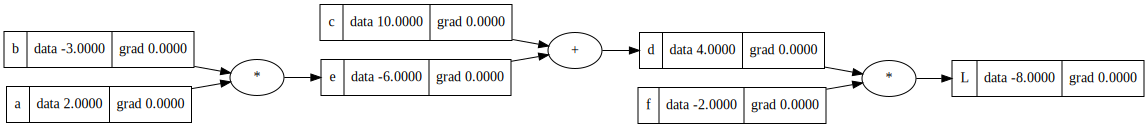

In [ ]:
draw_dot(L)

In [ ]:
def manual_backprop():

  h= 0.001
  a= Value(2.0, label='a')
  b= Value(-3.0, label='b')
  c= Value(10.0, label='c')
  e = a*b; e.label='e'
  d=e + c
  d.label= 'd'
  f= Value(-2.0, label='f')
  L1= d*f; L1.label='L1'
  L1=L1.data

  a= Value(2.0, label='a')
  b= Value(-3.0, label='b')
  c= Value(10.0, label='c')
  e = a*b; e.label='e'
  d=e + c; d.label= 'd'
  # d.data +=h# adding chnage to d to find gradient of d with respect to L
  f= Value(-2.0, label='f')
  L2= d*f ; L2.label='L2'
  L2=L2.data + h# added the change to root node to see the grad

  print( (L2 - L1)/h)


In [ ]:
manual_backprop()

1.000000000000334


In [ ]:
# doesn't pointing to the above  manual_backprop definition
L.grad=1.0 # setting manula gradient for the root node L from above definition
d.grad= -2.0
f.grad= 4.0

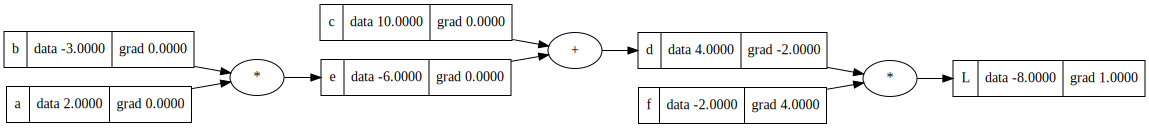

In [ ]:
draw_dot(L)

In [ ]:
# dL/dc = dL/dd * dd/dc
# dd/dc =?
# d = c + e
# dL/dc = (-2) * 1
# dL/dc = -2
c.grad= -2.0

In [ ]:
# dL/de = dL/dd * dd/de
# dd/de =?
# d = c + e
# dL/de = (-2) * (1)
# dL/de = -2
e.grad= -2.0

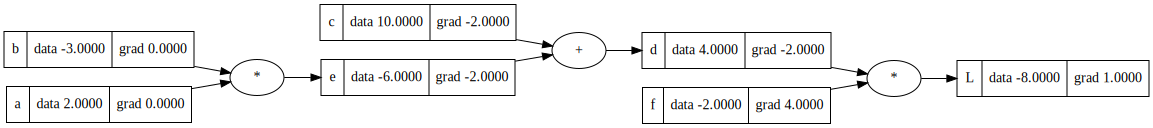

In [ ]:
draw_dot(L)

In [ ]:
#based on chain rule
a.grad= (-2.0)*(-3)
b.grad=(-2.0)*(2)

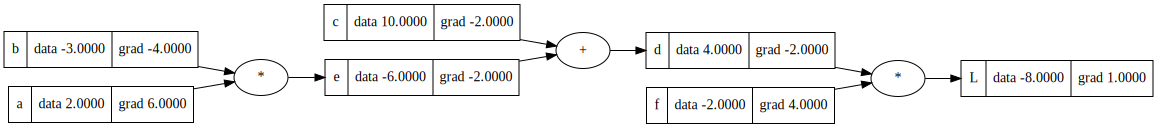

In [ ]:
draw_dot(L)

# Backpropagation Chain Rule

> If the node operation is '+' then the local derivative value(c) is 1.0. The grad is calculated as 1.0 times of previous grad(d) -2.0. The resultant grad in 'c' is -2.0. BAscially '+' nodes distributes the grad to previous.
 Whereas if the node operation is '*' then the result grad for 'b' is previous grad -2.0 times of a.data 2.0 which is -4.0.



In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

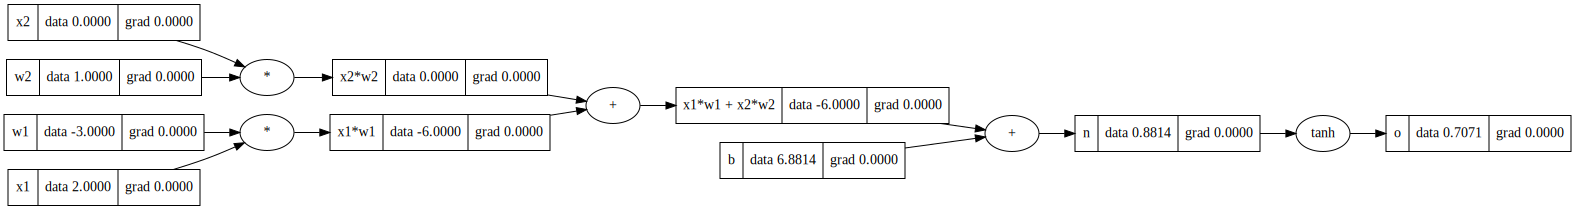

In [ ]:
draw_dot(o)

In [ ]:
# o= tanh()
# n.grad= 1- tanh()**2
n.grad= 1- o.data**2

In [ ]:
x1w1x2w2.grad= 1 * n.grad
b.grad= 1 * n.grad

x2w2.grad= 1 * x1w1x2w2.grad
x1w1.grad= 1 * x1w1x2w2.grad

In [ ]:
w2.grad= x2w2.grad * x2.data
x2.grad= x2w2.grad * w2.data

x1.grad= x1w1.grad * w1.data
w1.grad= x1w1.grad * x1.data

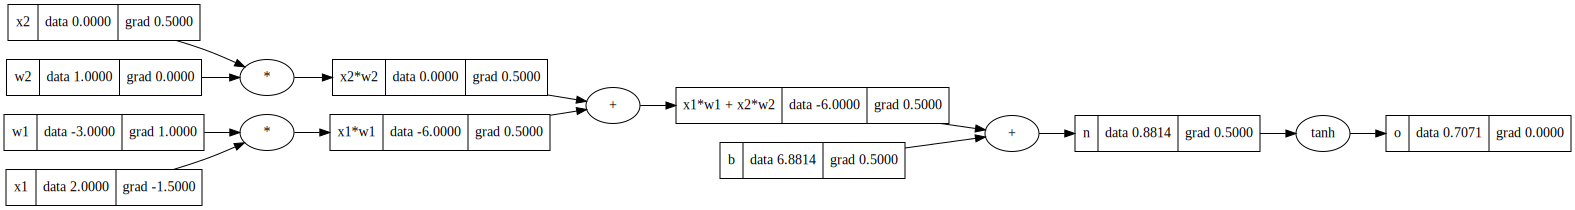

In [ ]:
draw_dot(o)